## Introduction

In this project, the **Titanic Passenger Data** is analyzed to infer certain characteristics of those who survived the disaster.

## Dataset

The dataset used here has information for 891 out of the 2224 passengers in the Titanic with details such as passenger class *Pclass*, name, sex, age, number of siblings/spouses aboard *SibSp*, number of parents/children aboard *Parch* and whether or not the passenger survived *Survived*. More information about the dataset can be found at [Kaggle](https://www.kaggle.com/c/titanic/data).

## Question
From the data provided, can we infer possible factors related to a pasenger's survival?

## Data Processing

### Prepare Python
Load the libraries and set plot parameters

In [63]:
# load libraries and set plot parameters
import numpy as np # import numpy
import pandas as pd # import pandas
#import PrettyTable as pt

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = \
    "\usepackage{subdepth}, \usepackage{type1cm}"

### The Data
The data contains 891 entries and 12 columns as mentioned above. From the information below, it should be noted that the age, cabin and port of embarkation columns don't report the correct number of entries. This is because these information are not supplied or missing for some of the passengers.

In [57]:
# read the predowloaded csv
titanicData = pd.read_csv("titanic_data.csv")
# print information about the dataframe
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Subset
The passenger ID will be used to identify a passenger. The independent variables in this case are sex, age and passenger class. The passenger's survival is the dependent variable to be correlated to these variables. Based on these information, other columns from the dataset are dropped.

In [58]:
# select the columns needed for the analysis
columNames = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']
passengers = titanicData[columNames]

### Age group
The age distribution of the passengers are shown below. There is a wide range of age aboard the Titanic with passengers as young as 4 months old to as old as 80 yrs old. To simplify the analysis, the age is grouped into five: children are those that are eight years old or below, adolescents are in the age range 9 to 14, adults for those between 15 to 44 years old, middle aged adults for ages 45 to 64, and old for those above 64 years old.

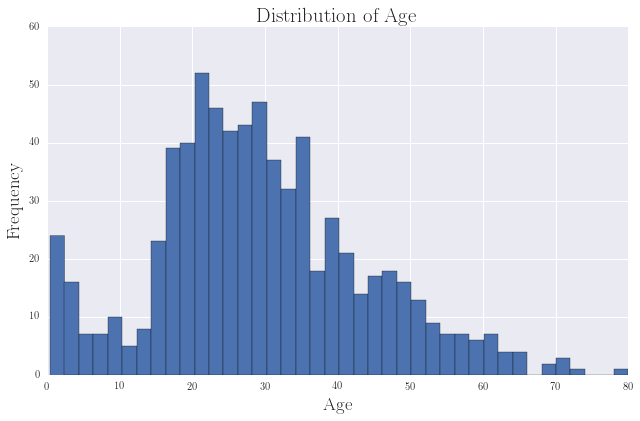

In [59]:
# plot the age distribution using histogram
plt.hist(passengers['Age'].dropna(), bins=40)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# age groups
ageGroups = ['children', 'adolescents', 'adults', \
             'middleaged', 'old', 'undefined']

'''
return an appropriate group for an input age
'''
def ageGroup(age):
    if (np.isnan(age)):
        return ageGroups[5]
    elif (age <= 8):
        return ageGroups[0]
    elif (age <= 14):
        return ageGroups[1]
    elif (age <= 44):
        return ageGroups[2]
    elif (age <= 64):
        return ageGroups[3]
    else:
        return ageGroups[4]

# create an age group column
passengers.loc[:,'AgeGroup'] = \
passengers.loc[:,'Age'].apply(ageGroup)

From the pie chart below, most of the passengers are adults and middle aged adults, a small portion of the passengers are children and very old. It should be noted that *20%* of the passengers have unknown age, these entries will be reoved from the analysis.

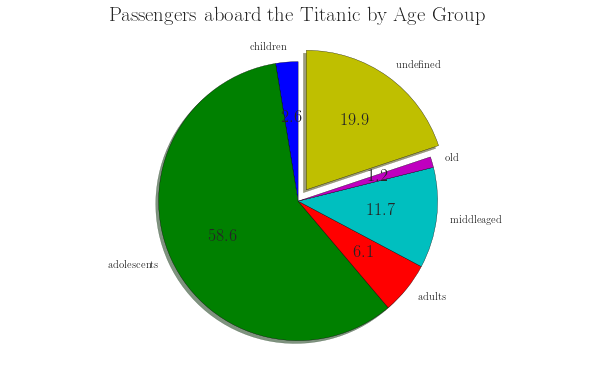

In [61]:
# compute fraction by age group
total_passengers = passengers['PassengerId'].count()
total_passengers_by_age_group = \
    passengers.groupby('AgeGroup').size()
fract_passengers_by_age_group = \
    (total_passengers_by_age_group/total_passengers) \
    .reset_index(name='Percentage')

# plot a pie chart
explode = (0, 0, 0, 0, 0, 0.1) 
plt.axis('equal')
plt.title('Passengers aboard the Titanic by Age Group')
patches, texts, autotexts = \
    plt.pie(fract_passengers_by_age_group['Percentage'], \
            labels=ageGroups, \
            explode=explode, \
            autopct="%1.1f%%", \
            shadow=True, \
           startangle=90)

# backup the original data
passengers_orig = passengers.copy()
# drop all entries with missing values
passengers = passengers.dropna()

### Separating the survivors from non-survivors 
Finally, to aid in the analysis, the survivors are separated from the non survivors

In [62]:
# separate the survivors from non survivors
survivors = passengers[passengers['Survived']==1]
survivors = survivors.drop('Survived', 1)
nonsurvivors = passengers[passengers['Survived']==0]
nonsurvivors = nonsurvivors.drop('Survived', 1)

## Result

In terms of gender, about *74%* female survived while only *19%* of the male passengers survived. First class passengers have the highest survival percentage while third class passengers have the lowest, according to the plot shown below. Finally, most of the children survived the disaster, while old people suffered the most casualties.

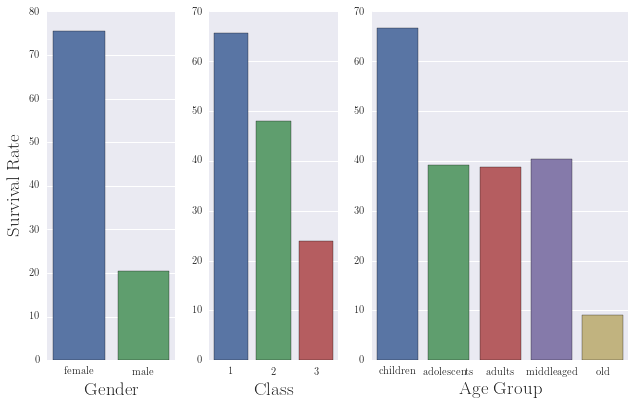

In [64]:
'''
Return a data frame of counts
'''
def getCount(df, filter=""):
    if filter:
        return df.groupby(filter)['PassengerId'].size()
    else:
        return df['PassengerId'].count()
    
'''
Returns the survival percentage
'''
def survivalRate(df1, df2, filter=""):
    return (getCount(df1,filter)/getCount(df2,filter)*100) \
        .reset_index(name="SurvivalRate")

# age groups
ageGroups = ['children', 'adolescents', \
             'adults', 'middleaged', 'old']
# bar plots of survival percentage
factors = ['Sex', 'Pclass', 'AgeGroup']
labels = ['Gender', 'Class', 'Age Group']

#fig, axs = plt.subplots(1,3,figsize=(10,4))
fig, axs = plt.subplots(1,3, \
        gridspec_kw = {'width_ratios':[1, 1, 2]})
for i, f in enumerate(factors):
    survival_rate = survivalRate(survivors, passengers, f)
    if (i==2):
        g = sns.barplot(x=f,y='SurvivalRate', \
            data=survival_rate, ax=axs[i], order=ageGroups)
    else:
        g = sns.barplot(x=f,y='SurvivalRate', \
            data=survival_rate, ax=axs[i])
    g.set(xlabel=labels[i], ylabel='')
axs.flat[0].set_ylabel('Survival Rate')

Considering all three factors, it can be observed that older male passengers on the second class have the most casualties.

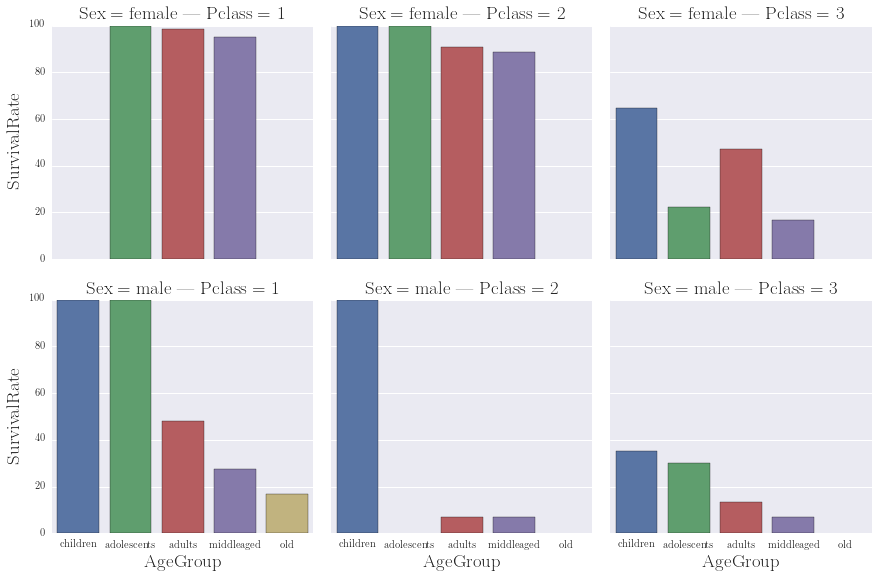

In [65]:
# compute the survival rate but this 
# time the three factors are considered
survival_rate = survivalRate(survivors, passengers, \
                             ['Sex','Pclass','AgeGroup'])

sns.factorplot(x='AgeGroup', y='SurvivalRate', \
               order=ageGroups, \
               col='Pclass', row='Sex', \
               data=survival_rate, \
               kind="bar")

## Conclusion

In this project, the Titanic passenger data was analyzed to look at the factors related to the passenger's survival. Only three variables are considered in this project namely: age, gender and class. Most male survivors are children in the first class while for female, almost all age group in the first and second class have high survivor percentage. For both gender and age groups, a lot of casualties came from the third class.

About *20%* of the data is discarded because they do not provide the information needed, in this case, the age of the passenger. The removal of data from the analysis may have affected the result, statistical test may be needed to justify the action but it was not done in this project. Statistical analysis is also important to prove correlation between the factors considered and the survival rate. Thus, the result of this analysis are descriptive only and doesn't imply correlation. However, statistical analysis is not enough to prove causation especialy for the observed data used in this project. Causation may be proven by repeated experimentations and test cases which is not plausible for the given scenario.